In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules

In [326]:
df = pd.read_excel('Online Retail.xlsx')
# Removing white space from Description column
df['Description'] = df.Description.str.strip()
# Changing dtypes to string
df['InvoiceNo'] = df.InvoiceNo.astype('str')
# fetching numeric part from the invoice
df['InvoiceNo'] = df.InvoiceNo.str.extract(r'(\d+)')
# converting invoice column into int
df['InvoiceNo'] = df.InvoiceNo.astype(int)
# Renaming InvoiceDate to InvoiceTime as iit includes hr:min:sec
df = df.rename(columns = {"InvoiceDate":'InvoiceTime'})
# Droping duplicate rows
df = df.drop_duplicates().reset_index(drop=True)
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceTime,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [438]:
# Checking number of rows containing UnitPrice = 0 or negative
df[df.UnitPrice<=0].shape[0]

2512

There are 2512 rows containting 0 or negative `UnitPrice`.Since `UnitPrice` can not be 0 or negative, I can remove those columns

In [451]:
# Checking number of rows containing Quantity = 0 or negative
df[df.Quantity	<0].shape[0]

9251

There are 9251 rows containting 0 or negative `Quantity`.Since `Quantity` can not be 0 or negative, I can remove those columns

In [464]:
df = df[~((df.UnitPrice<=0)|(df.Quantity<0))]

In [465]:
# checking shape of columns
df.shape

(524878, 11)

In [466]:
# checking info of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524878 entries, 0 to 536640
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           524878 non-null  int32         
 1   StockCode           524878 non-null  object        
 2   Description         524878 non-null  object        
 3   Quantity            524878 non-null  int64         
 4   InvoiceTime         524878 non-null  datetime64[ns]
 5   UnitPrice           524878 non-null  float64       
 6   CustomerID          392692 non-null  float64       
 7   Country             524878 non-null  object        
 8   InvoiceDate         524878 non-null  datetime64[ns]
 9   InvoiceMonth        524878 non-null  object        
 10  product_wise_sales  524878 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int32(1), int64(1), object(4)
memory usage: 46.1+ MB


In [467]:
# checking null values of columms
df.isnull().sum()

InvoiceNo                  0
StockCode                  0
Description                0
Quantity                   0
InvoiceTime                0
UnitPrice                  0
CustomerID            132186
Country                    0
InvoiceDate                0
InvoiceMonth               0
product_wise_sales         0
dtype: int64

In [468]:
# checking country wise number of transactions
df.Country.value_counts()

United Kingdom          479985
Germany                   9025
France                    8392
EIRE                      7879
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1958
Portugal                  1492
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon 

There are $9480$ transactions in Germany lets try market basket analysis in Germany.

### Market basket analysis

In [469]:
# Creating Invoice vs Product matrix
germany_basket = df[df.Country=='Germany'].groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().fillna(0)
germany_basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [458]:
# Creating a function that transform all the quantitest >1 to 1 
my_encode_units = lambda x: 0 if x<=0 else 1
# Apply function on germany_basket dataframe
germany_basket_set = germany_basket.applymap(my_encode_units)
# POSTAGE column is unnecessary. So, I can remove it
germany_basket_set.drop('POSTAGE',axis=1,inplace=True)
germany_basket_set.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [459]:
# Selecting most frequent items
germany_frequent_items = apriori(germany_basket_set,min_support=0.01,use_colnames=True)
# Applying association rule on most frequent items
germany_rule = association_rules(germany_frequent_items,metric='lift',min_threshold=0.1)
germany_rule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ROUND SNACK BOXES SET OF4 WOODLAND),(12 PENCILS TALL TUBE WOODLAND),0.185738,0.014925,0.011609,0.062500,4.187500,0.008836,1.050746
1,(12 PENCILS TALL TUBE WOODLAND),(ROUND SNACK BOXES SET OF4 WOODLAND),0.014925,0.185738,0.011609,0.777778,4.187500,0.008836,3.664179
2,(3 HOOK HANGER MAGIC GARDEN),(ROUND SNACK BOXES SET OF 4 FRUITS),0.024876,0.119403,0.011609,0.466667,3.908333,0.008638,1.651119
3,(ROUND SNACK BOXES SET OF 4 FRUITS),(3 HOOK HANGER MAGIC GARDEN),0.119403,0.024876,0.011609,0.097222,3.908333,0.008638,1.080138
4,(ROUND SNACK BOXES SET OF4 WOODLAND),(3 HOOK HANGER MAGIC GARDEN),0.185738,0.024876,0.011609,0.062500,2.512500,0.006988,1.040133


In [470]:
Total_purchase = len(germany_basket_set)
print('Total purchase = ',Total_purchase)

item_A_purchase = germany_basket_set['ROUND SNACK BOXES SET OF4 WOODLAND'].sum()
item_B_purchase = germany_basket_set['12 PENCILS TALL TUBE WOODLAND'].sum()
item_AB_purchase = len(germany_basket_set[(germany_basket_set['ROUND SNACK BOXES SET OF4 WOODLAND']==1) & 
                       (germany_basket_set['12 PENCILS TALL TUBE WOODLAND']==1)])
print('Itema A purchased = ',item_A_purchase)
print('Itema B purchased = ',item_B_purchase)
print('Itema A+B purchased = ',item_AB_purchase,'\n')

support_A = item_A_purchase / Total_purchase
support_B = item_B_purchase / Total_purchase
support_AB = item_AB_purchase / Total_purchase
print('support A = ',round(support_A,6))
print('support B = ',round(support_B,6))
print('support = ',round(support_AB,6),'\n')

confidence = item_AB_purchase / item_A_purchase
print('confidence = ',round(confidence,6))
lift = confidence/support_B
print('lift = ',lift)
leverage = support_AB - support_A*support_B
print('leverage',round(leverage,6))
conviction = (1-support_B)/(1-confidence)
print('conviction = ',round(conviction,6))

Total purchase =  603
Itema A purchased =  112
Itema B purchased =  9
Itema A+B purchased =  7 

support A =  0.185738
support B =  0.014925
support =  0.011609 

confidence =  0.0625
lift =  4.1875
leverage 0.008836
conviction =  1.050746


### Time Series Analysis

In [364]:
# Creating a column product_wise_sales by multiplying qutity of product with their unit price
df['product_wise_sales'] = df.Quantity * df.UnitPrice

# creatin new column at date column of date interval
df['InvoiceDate'] = pd.to_datetime(df.InvoiceTime.dt.date)
# Creating column of month interval for plotting the data
df['InvoiceMonth'] = df.InvoiceTime.dt.date.astype('str').str.extract(r'(\d+-\d+)')

In [428]:
# creating monthwise invoice generation and sales data
sales = df.groupby('InvoiceMonth').agg(total_invoices=('InvoiceNo','count'),total_sales=('product_wise_sales','sum'))

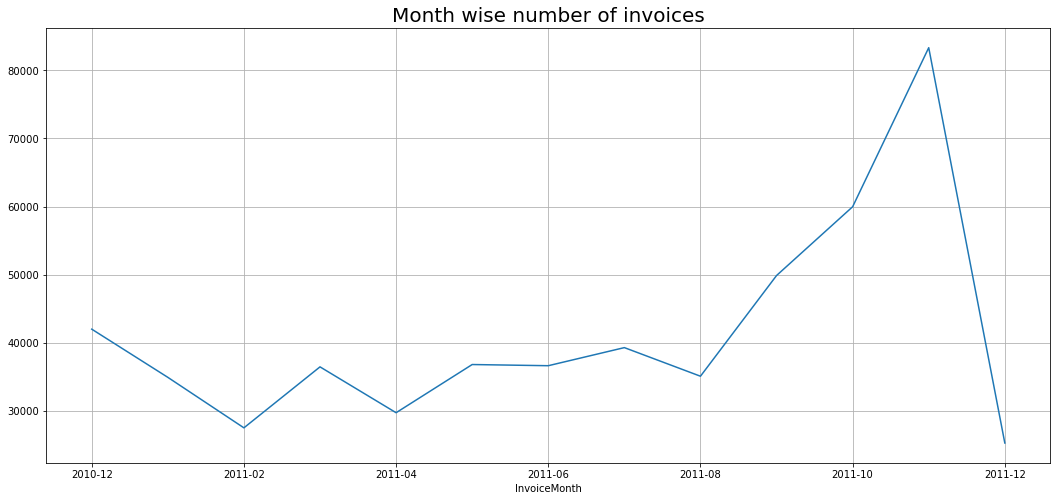

In [425]:
# Ploting Month wise number of invoices
sales.total_invoices.plot(figsize=(18,8))
plt.title('Month wise number of invoices',fontsize=20)
plt.grid(True)

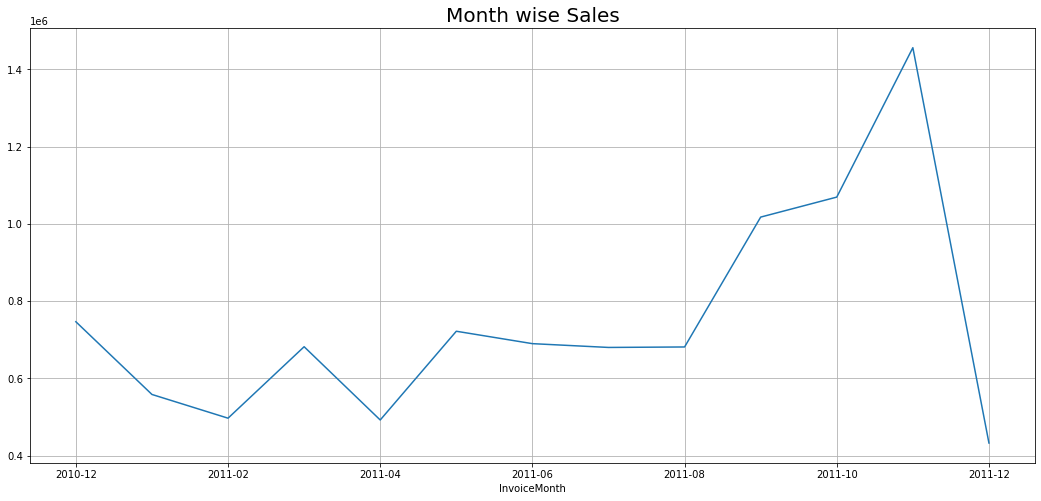

In [427]:
# Ploting Month wise Sales
sales.total_sales.plot(figsize=(18,8))
plt.title('Month wise Sales',fontsize=20)
plt.grid(True)

November 2011 was highest saling month.

### Getting Top 5 Products in terms of quantity and revenue

In [480]:
product_wise_sales = df.groupby('Description').agg(Quantity=('product_wise_sales','count'),Sales=('product_wise_sales','sum'))
# Getting Top-5 Saling product interms of revenue
product_wise_sales.sort_values(by='Sales',ascending=False).head()

,Quantity,Sales
Description,,
DOTCOM POSTAGE,706,206248.77
REGENCY CAKESTAND 3 TIER,2007,174156.54
"PAPER CRAFT , LITTLE BIRDIE",1,168469.60
WHITE HANGING HEART T-LIGHT HOLDER,2311,106236.72
PARTY BUNTING,1699,99445.23


In [481]:
# Getting Top-5 Saling product interms of quantity
product_wise_sales.sort_values(by='Quantity',ascending=False).head()

,Quantity,Sales
Description,,
WHITE HANGING HEART T-LIGHT HOLDER,2311,106236.72
JUMBO BAG RED RETROSPOT,2109,94159.81
REGENCY CAKESTAND 3 TIER,2007,174156.54
PARTY BUNTING,1699,99445.23
LUNCH BAG RED RETROSPOT,1581,35572.36


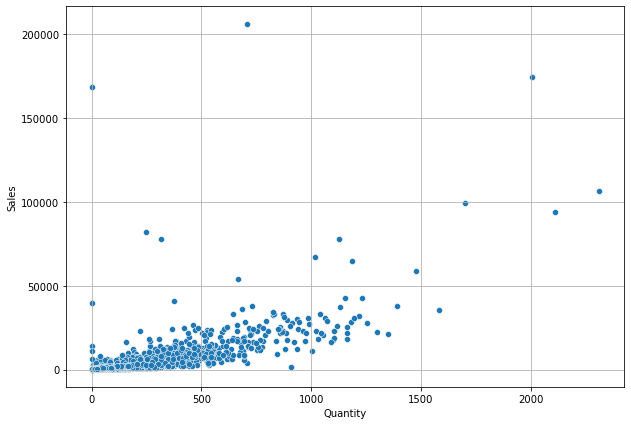

In [487]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Quantity',y='Sales',data=product_wise_sales)
plt.grid(True)
plt.show()